In [119]:
import pandas as pd
from pathlib import Path
import os
import glob

In [120]:
from typing import AnyStr


lightsail2: Path = "../data/satellites/lightsail-2"

all_files: list[AnyStr] = glob.glob(os.path.join(lightsail2, "*.csv"))

lightsail2_data = pd.DataFrame()

for f in all_files:
    parsed_df: pd.DataFrame = pd.read_csv(f, parse_dates=["Time"])
    
    if lightsail2_data.empty:
        lightsail2_data = parsed_df
    
    if not parsed_df.empty:
        lightsail2_data = pd.merge(lightsail2_data, parsed_df, on="Time", how="outer")

lightsail2_data['Time'] = pd.to_datetime(lightsail2_data['Time']).dt.normalize()

print(lightsail2_data)

          Time  Motor Power Bus Voltage_x  Motor Power Bus Voltage_y  \
0   2019-07-02                       0.00                       0.00   
1   2019-07-03                       0.00                       0.00   
2   2019-07-04                       2.50                       2.50   
3   2019-07-05                       0.87                       0.87   
4   2019-07-06                       0.00                       0.00   
..         ...                        ...                        ...   
391 2022-11-11                       0.00                       0.00   
392 2022-11-12                       0.00                       0.00   
393 2022-11-13                       0.00                       0.00   
394 2022-11-14                       0.00                       0.00   
395 2022-11-15                       0.00                       0.00   

     Daughter B Power Bus Voltage  Daughter A Power Bus Voltage  \
0                               0                         0.000   
1

In [121]:
import json
from typing import Any


swpc_observed_ssn_path: Path = "../data/solar/swpc/swpc_observed_ssn.json"

swpc_observed_ssn = pd.DataFrame()

with open(swpc_observed_ssn_path, 'r') as f:
    loaded_json: Any = json.load(f)
    swpc_observed_ssn = pd.DataFrame(loaded_json)
    
swpc_observed_ssn['Obsdate'] = pd.to_datetime(swpc_observed_ssn['Obsdate'])


print(swpc_observed_ssn)

        Obsdate  swpc_ssn
0    1996-03-12         0
1    1996-08-18        14
2    1996-08-19         0
3    1996-08-20         0
4    1996-08-21        12
...         ...       ...
9132 2024-09-29       154
9133 2024-09-30       150
9134 2024-10-01       196
9135 2024-10-02       194
9136 2024-10-03       184

[9137 rows x 2 columns]


In [122]:
from matplotlib import pyplot as plt

dynamics = pd.merge(lightsail2_data, swpc_observed_ssn, left_on='Time', right_on='Obsdate', how='inner')
dynamics.drop(columns=['Obsdate'], inplace=True)

print(dynamics)

          Time  Motor Power Bus Voltage_x  Motor Power Bus Voltage_y  \
0   2019-07-07                      0.000                      0.000   
1   2019-07-08                      0.850                      0.850   
2   2019-07-09                      0.580                      0.580   
3   2019-07-10                      0.056                      0.056   
4   2019-07-11                      0.000                      0.000   
..         ...                        ...                        ...   
280 2022-11-11                      0.000                      0.000   
281 2022-11-12                      0.000                      0.000   
282 2022-11-13                      0.000                      0.000   
283 2022-11-14                      0.000                      0.000   
284 2022-11-15                      0.000                      0.000   

     Daughter B Power Bus Voltage  Daughter A Power Bus Voltage  \
0                               0                        0.0000   
1

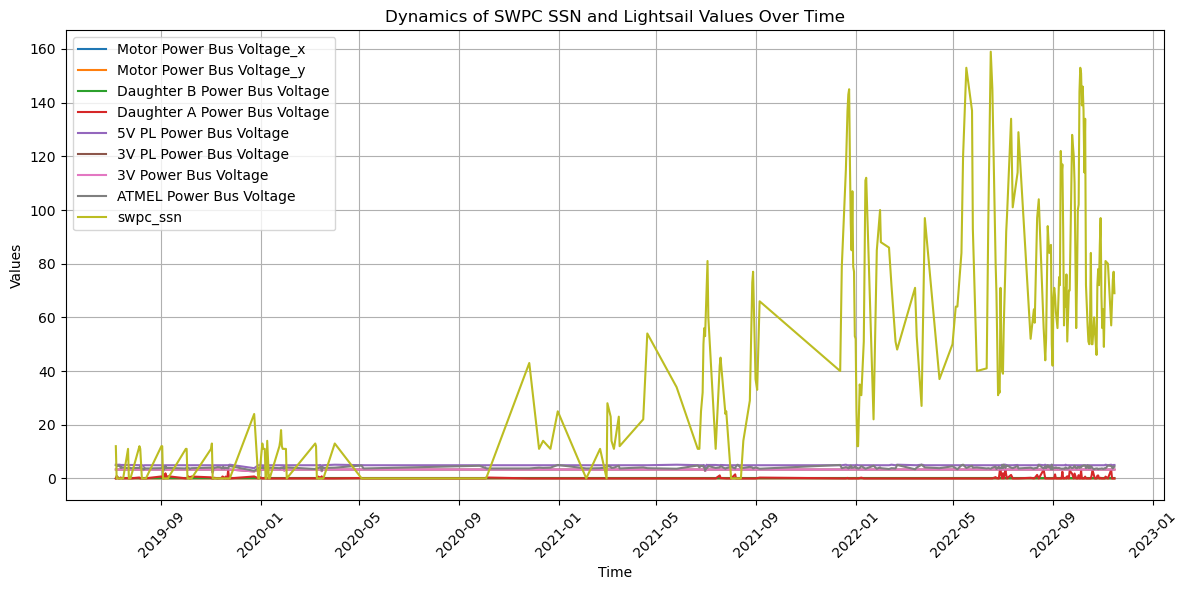

In [123]:

plt.figure(figsize=(12, 6))

for column in dynamics.columns:
    if column not in ['Time']:
        plt.plot(dynamics['Time'], dynamics[column], label=column)
        
plt.title('Dynamics of SWPC SSN and Lightsail Values Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

In [124]:
print(dynamics.columns)

Index(['Time', 'Motor Power Bus Voltage_x', 'Motor Power Bus Voltage_y',
       'Daughter B Power Bus Voltage', 'Daughter A Power Bus Voltage',
       '5V PL Power Bus Voltage', '3V PL Power Bus Voltage',
       '3V Power Bus Voltage', 'ATMEL Power Bus Voltage', 'swpc_ssn'],
      dtype='object')


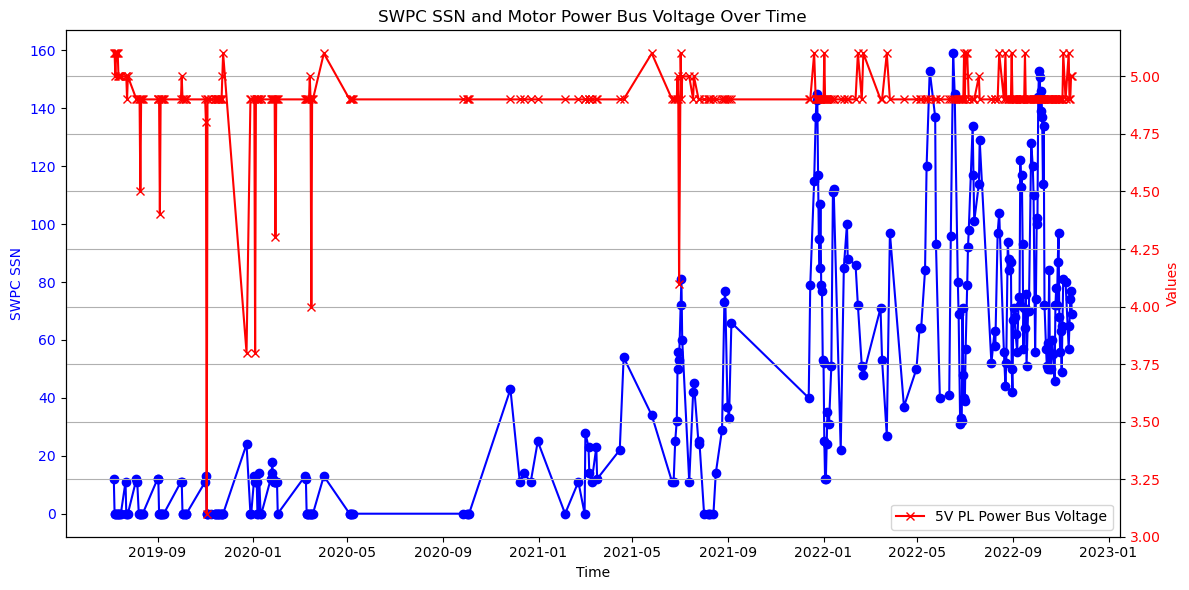

In [125]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(
    dynamics["Time"],
    dynamics["swpc_ssn"],
    label="SWPC SSN",
    marker="o",
    color="blue",
)
ax1.set_xlabel("Time")
ax1.set_ylabel("SWPC SSN", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(
    dynamics["Time"],
    dynamics["5V PL Power Bus Voltage"],
    label="5V PL Power Bus Voltage",
    marker="x",
    color="red",
)
ax2.set_ylabel("5V PL Power Bus Voltage", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("SWPC SSN and Motor Power Bus Voltage Over Time")
plt.xlabel("Time")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
fig.tight_layout()

plt.show()

In [147]:
correlations = dynamics.corr(method='pearson').drop('Time')

print(correlations["swpc_ssn"])

correlations = dynamics.corr(method='kendall').drop('Time')

print(correlations["swpc_ssn"])

correlations = dynamics.corr(method='spearman').drop('Time')

print(correlations["swpc_ssn"])

Motor Power Bus Voltage_x      -0.095786
Motor Power Bus Voltage_y      -0.095786
Daughter B Power Bus Voltage         NaN
Daughter A Power Bus Voltage    0.095862
5V PL Power Bus Voltage         0.091481
3V PL Power Bus Voltage         0.110060
3V Power Bus Voltage            0.110060
ATMEL Power Bus Voltage         0.092623
swpc_ssn                        1.000000
Name: swpc_ssn, dtype: float64
Motor Power Bus Voltage_x      -0.127894
Motor Power Bus Voltage_y      -0.127894
Daughter B Power Bus Voltage         NaN
Daughter A Power Bus Voltage   -0.144434
5V PL Power Bus Voltage        -0.005603
3V PL Power Bus Voltage         0.113282
3V Power Bus Voltage            0.113282
ATMEL Power Bus Voltage         0.018044
swpc_ssn                        1.000000
Name: swpc_ssn, dtype: float64
Motor Power Bus Voltage_x      -0.151687
Motor Power Bus Voltage_y      -0.151687
Daughter B Power Bus Voltage         NaN
Daughter A Power Bus Voltage   -0.182084
5V PL Power Bus Voltage        -0.00

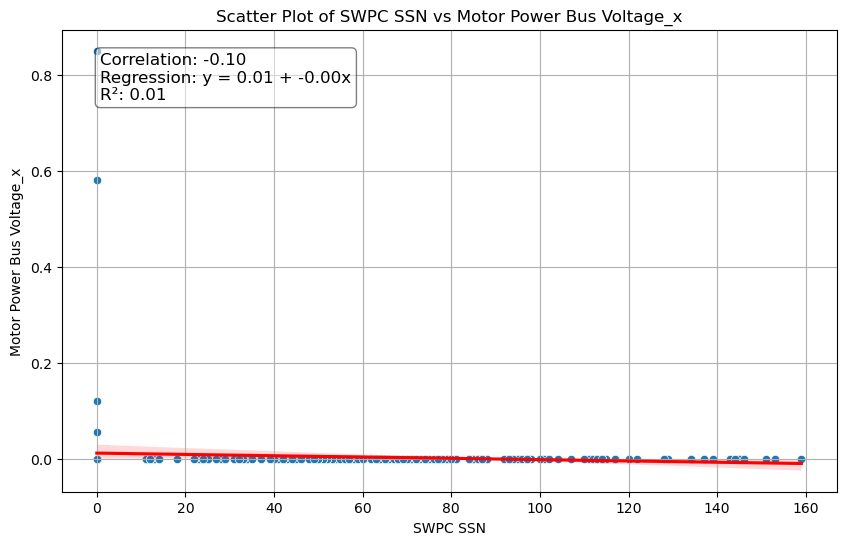

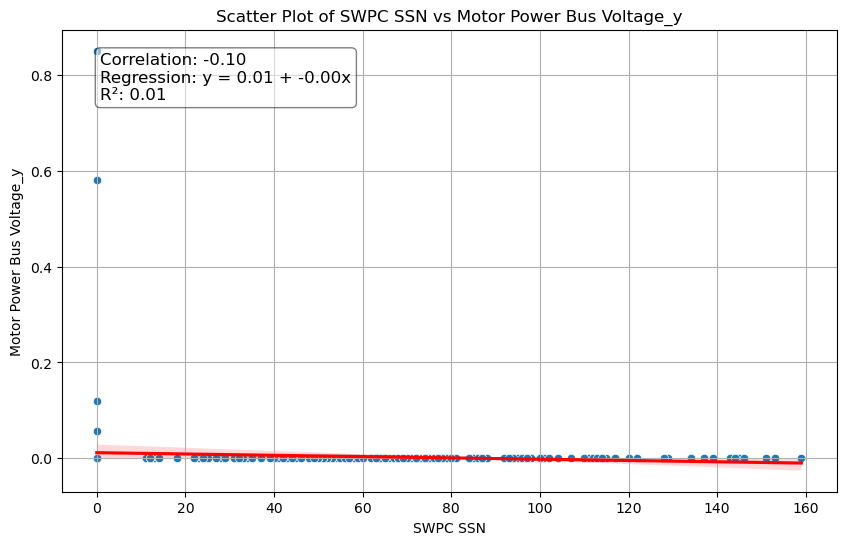

/usr/lib64/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/lib64/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/egleba/.local/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


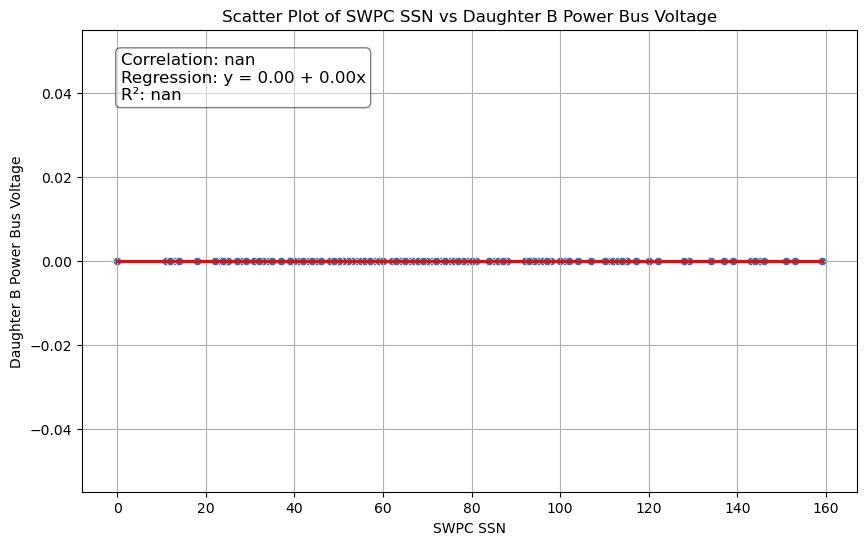

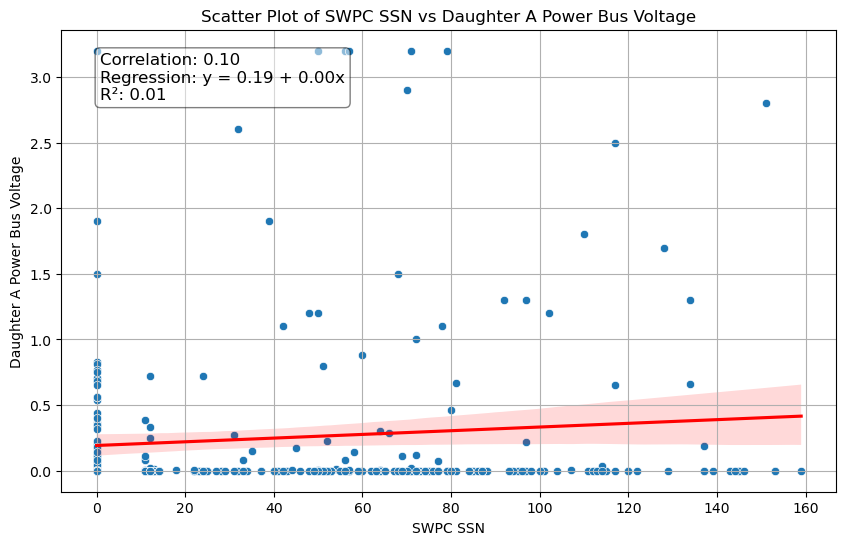

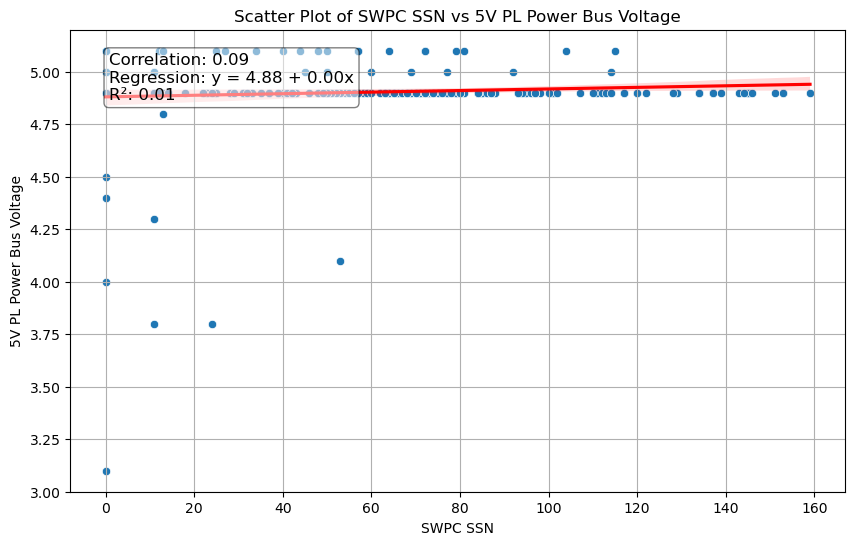

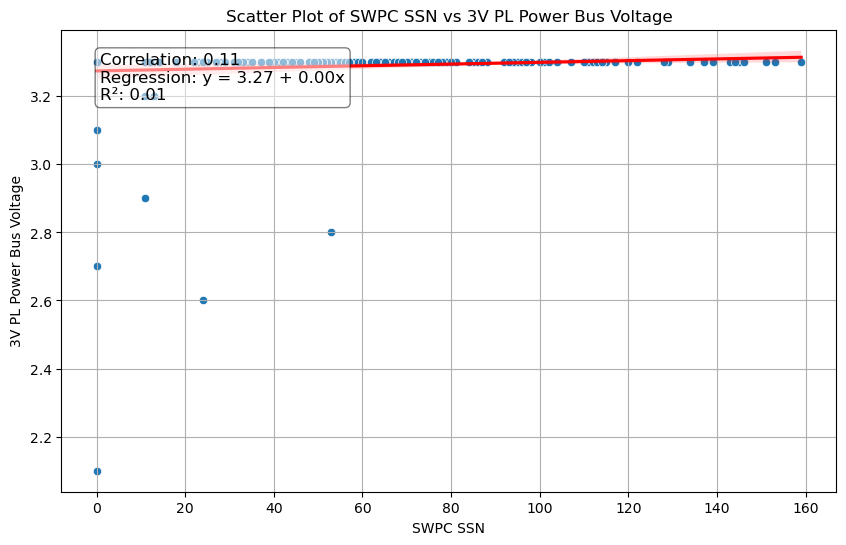

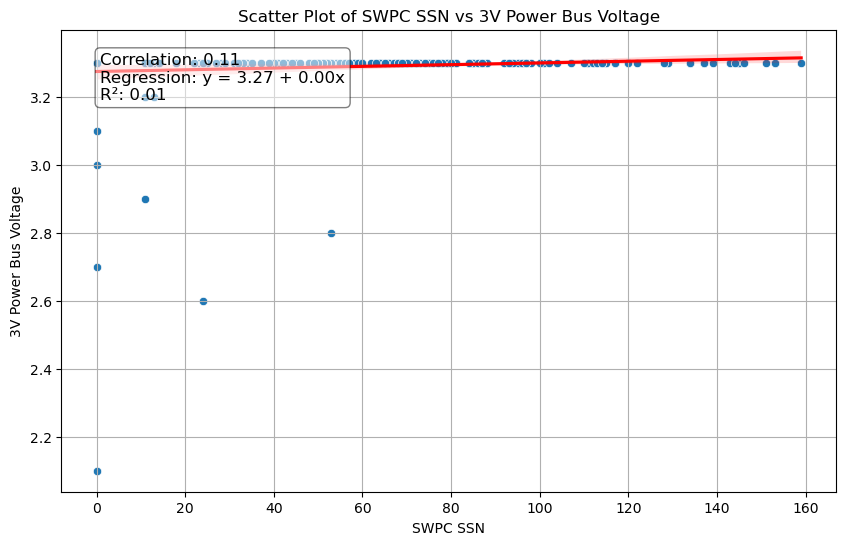

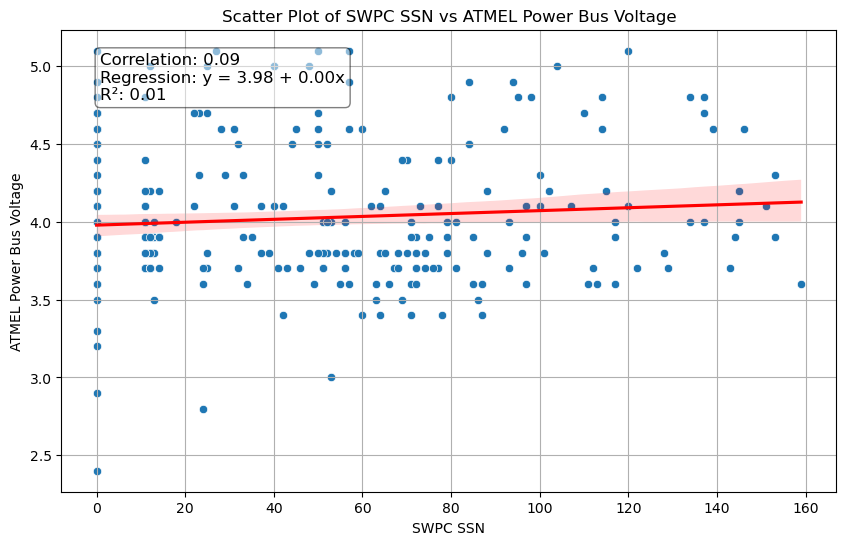

In [156]:
import statsmodels.api as sm
import numpy as np
import seaborn as sns

for column in dynamics.columns:
    if not column in ['swpc_ssn', 'Time']:
        plt.figure(figsize=(10, 6))
        
        sns.scatterplot(data=dynamics, x='swpc_ssn', y=column)
        
        x = dynamics['swpc_ssn']
        y = dynamics[column]
        x = sm.add_constant(x)
        
        model = sm.OLS(y, x).fit() 
        sns.regplot(data=dynamics, x='swpc_ssn', y=column, scatter=False, color='red')
        
        correlation_coefficient = np.corrcoef(dynamics['swpc_ssn'], dynamics[column])[0][1]
        r_squared = model.rsquared
        
        intercept = model.params.iloc[0]
        slope = model.params.iloc[1]
        
        std_err = model.bse.iloc[1]
        p_value = model.pvalues.iloc[1]
        
        conf_int = model.conf_int().loc['swpc_ssn']
        
        plt.title(f'Scatter Plot of SWPC SSN vs {column}')
        plt.xlabel('SWPC SSN')
        plt.ylabel(column)
        
        textstr = (
            f"Correlation: {correlation_coefficient:.2f}\n"
            f"Regression: y = {intercept:.2f} + {slope:.2f}x\n"
            f"R²: {r_squared:.2f}\n"
            f"Slope Std Err: {std_err:.2f}\n"
            f"P-value: {p_value:.3f}\n"
            f"95% CI: [{conf_int[0]:.2f}, {conf_int[1]:.2f}]"
        )
        
        plt.gca().text(
            0.05,
            0.95,
            textstr,
            transform=plt.gca().transAxes,
            fontsize=12,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.5),
        )

        plt.grid()
        plt.show()